Acquisition and Analysis of Neural Data 

Exercise 01

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 

# Exercise 1

In [2]:
spike_times = np.loadtxt('SpikeTimes.dat')/1e3
spike_times = np.nan_to_num(spike_times, nan=-1).T
max_t = 5.5
del_t = 1e-4
num_trial = 100

In [3]:
sr = int(1./del_t)
num_samples = int(max_t*sr)
t = np.arange(0, max_t, step=del_t)

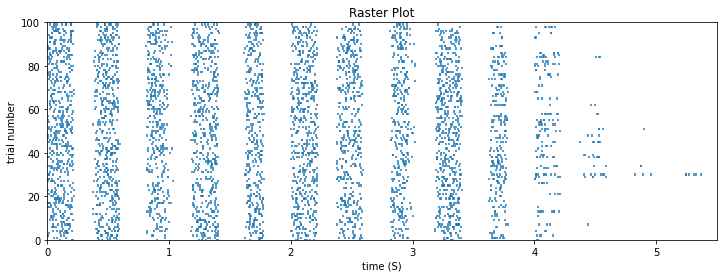

In [4]:
plt.figure(figsize=(12,4))
plt.eventplot(spike_times)
plt.xlim(0, max_t)
plt.ylim(0, num_trial)
plt.title('Raster Plot')
plt.ylabel('trial number')
plt.xlabel('time (S)')
plt.show()

In [5]:
def time_to_dirac(data, num_trial, num_samples):
    spike_del = np.zeros((num_trial,num_samples))

    for i in range(num_trial):
        temp_idx = data[i,:]
        temp_idx = temp_idx[temp_idx > 0]
        temp_idx = (temp_idx * sr).astype(int)
        spike_del[i,temp_idx] = 1
        #spike_idx = spike_times[]
    
    return spike_del

In [6]:
spike_del = time_to_dirac(spike_times, num_trial, num_samples)

In [7]:
trial_avg_100 = np.mean(spike_del, axis=0)
trial_avg_50 = np.mean(spike_del[:50,:], axis=0)
trial_avg_10 = np.mean(spike_del[:10,:], axis=0)

In [8]:
def plot_rect_kernel(
    data, 
    title = 'Trial Average Spike Rate Plot for Rectangular Kernel', 
    max_t = max_t):
    kernel_del_t = [30e-3, 90e-3, 200e-3]
    fig, ax = plt.subplots(3,1, sharex=True, figsize=(14,12))
    fig.suptitle(title, fontsize=24)
    for i, kdel_t in enumerate(kernel_del_t):
        rect_kernel =  np.full(int(kdel_t*sr), 1./kdel_t)
        rect_convolved = np.convolve(data, rect_kernel, mode='same')
        ax[i].plot(t, rect_convolved)
        ax[i].set_title(' Width: {} mS'.format(str(kdel_t*1000)))
        ax[i].set_xlabel('Time (S)')
        ax[i].set_ylabel('Spike Rate (Hz)')
        ax[i].set_xlim(0, max_t)
        ax[i].set_ylim(0, 50)

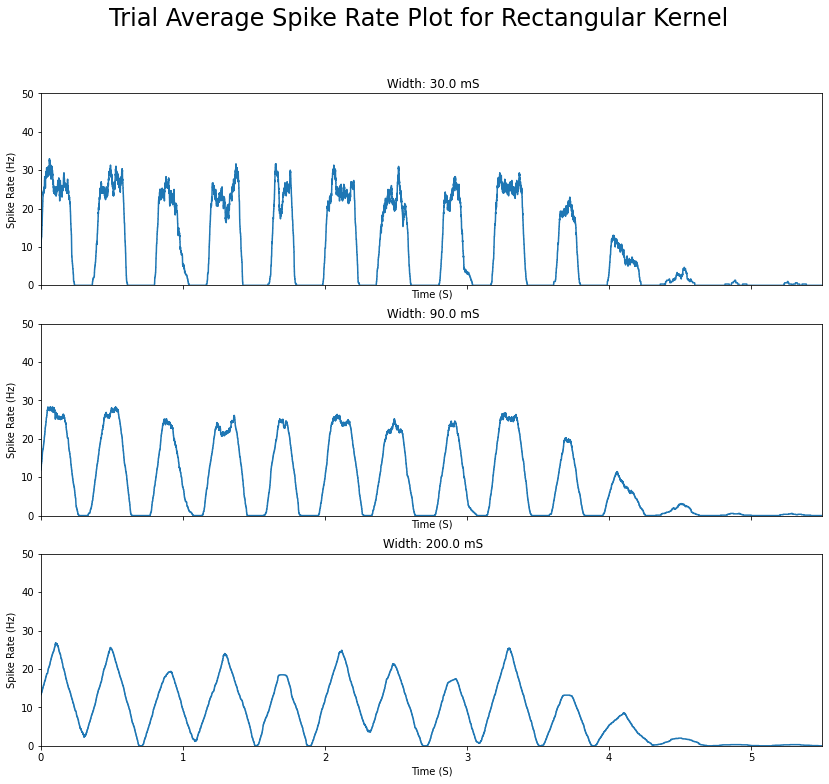

In [9]:
plot_rect_kernel(trial_avg_100, title='100 Trial Average Spike Rate for Rectangular Kernel')

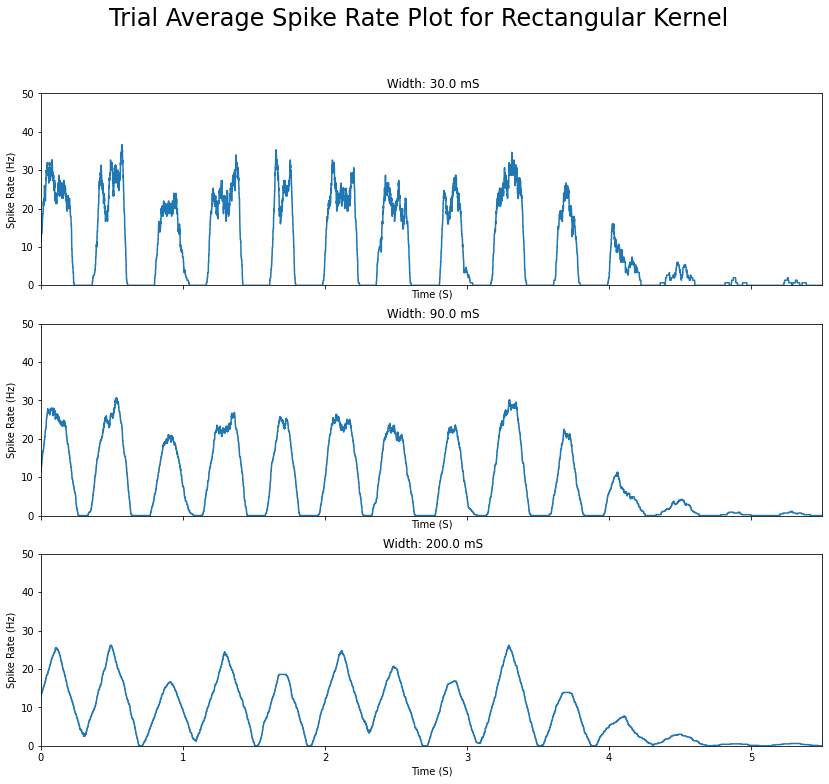

In [10]:
plot_rect_kernel(trial_avg_50, title='50 Trial Average Spike Rate for Rectangular Kernel')

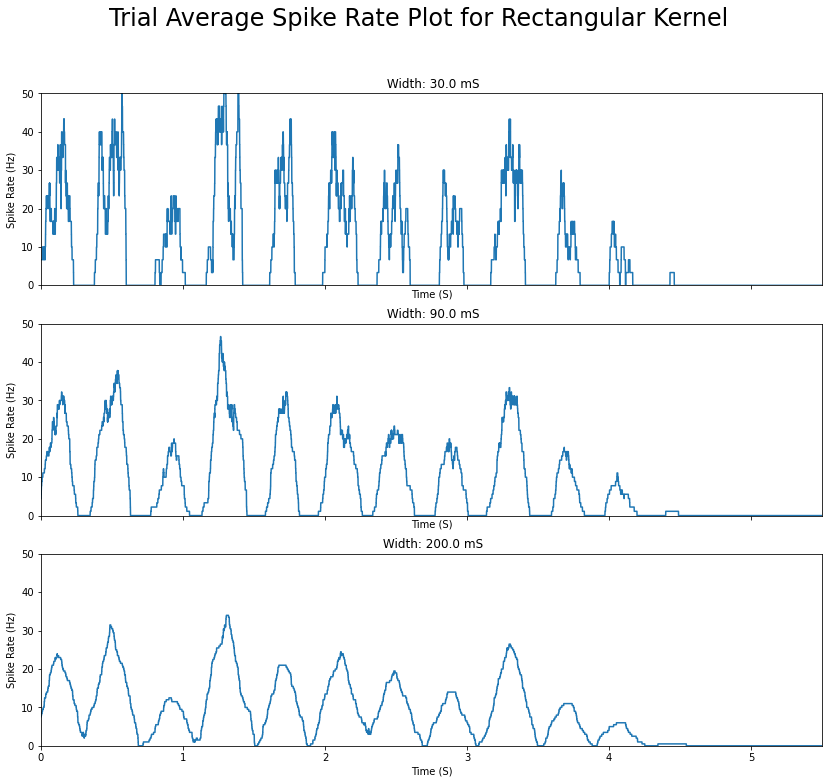

In [11]:
plot_rect_kernel(trial_avg_10, title='10 Trial Average Spike Rate for Rectangular Kernel')

Discussion :

# Exercise 2

In [47]:
mat_data = scipy.io.loadmat('STA_data.mat')
stimulus = mat_data['Stimulus'].ravel()
spike_times_2 = mat_data['SpikeTimes']/1e3
spike_times_2 = np.nan_to_num(spike_times_2, nan=-1).T

In [48]:
num_trial = 100
num_samples = sr 

In [49]:
spike_del_2 = time_to_dirac(spike_times_2, num_trial, num_samples)

In [50]:
trial_avg_2 = np.mean(spike_del_2, axis=0)

In [65]:
corr = np.correlate(trial_avg_2, stimulus, 'full')

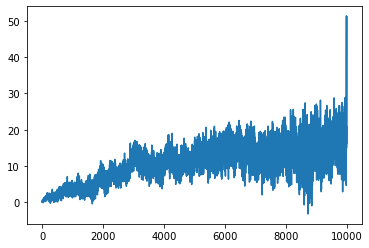

In [66]:
plt.plot(corr[:num_samples])

In [46]:
stimulus.shape

(10000, 1)